<a href="https://colab.research.google.com/github/tewei0328/visulization/blob/main/viz3_0050_0056_plotly_altair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 6.4 MB 56.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


#Yahoo Finance
https://finance.yahoo.com/world-indices

In [2]:
import yfinance
stock1=yfinance.Ticker('0050.TW')
df1=stock1.history(period='1y')
df1.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-03-18,135.100006,136.050003,134.800003,134.899994,6904704,0,0
2021-03-19,133.449997,133.500000,132.300003,132.800003,9925322,0,0
2021-03-22,132.399994,133.600006,131.600006,133.399994,5306034,0,0
2021-03-23,133.899994,134.699997,133.600006,133.600006,6866901,0,0
2021-03-24,131.800003,132.449997,131.300003,131.500000,10243129,0,0


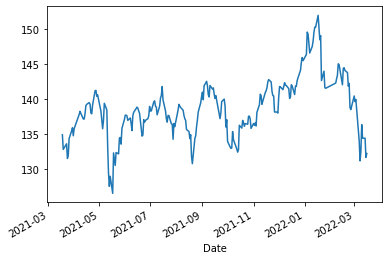

In [3]:
df1.Close.plot()

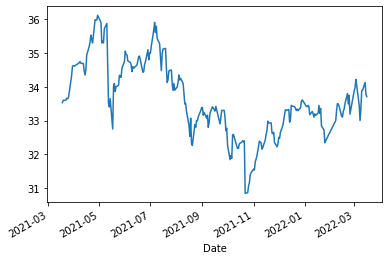

In [4]:
stock2=yfinance.Ticker('0056.TW')
df2=stock2.history(period='1y')
df2.head()
df2.Close.plot()

In [5]:
import pandas as pd
df_many = pd.concat([df1.Close, df2.Close], axis=1)
df_many.columns=['0050','0056']

In [6]:
df_many.head()

,0050,0056
Date,,
2021-03-18,134.899994,33.529999
2021-03-19,132.800003,33.599998
2021-03-22,133.399994,33.599998
2021-03-23,133.600006,33.660000
2021-03-24,131.500000,33.650002


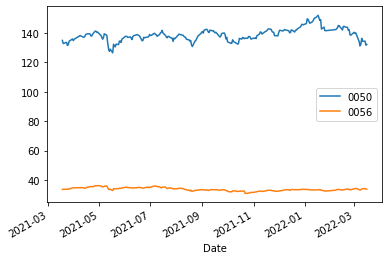

In [7]:
df_many.plot()

In [8]:
df_many['0050']=df_many['0050']/df_many.iloc[0][0]
df_many['0056']=df_many['0056']/df_many.iloc[0][1]

In [9]:
df_many.head()

,0050,0056
Date,,
2021-03-18,1.000000,1.000000
2021-03-19,0.984433,1.002088
2021-03-22,0.988881,1.002088
2021-03-23,0.990363,1.003877
2021-03-24,0.974796,1.003579


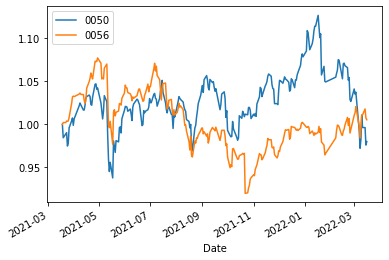

In [10]:
df_many.plot()

#畫Plotly版互動圖
##要有Date欄位才可

In [11]:
df=df_many

In [12]:
df.head()

,0050,0056
Date,,
2021-03-18,1.000000,1.000000
2021-03-19,0.984433,1.002088
2021-03-22,0.988881,1.002088
2021-03-23,0.990363,1.003877
2021-03-24,0.974796,1.003579


In [13]:
df['Date']=df.index

In [14]:
df.head()

,0050,0056,Date
Date,,,
2021-03-18,1.000000,1.000000,2021-03-18
2021-03-19,0.984433,1.002088,2021-03-19
2021-03-22,0.988881,1.002088,2021-03-22
2021-03-23,0.990363,1.003877,2021-03-23
2021-03-24,0.974796,1.003579,2021-03-24


In [16]:
import plotly.graph_objects as go
line1 = go.Scatter(x=df['Date'], y=df['0050'], name='0050')
fig  = go.Figure(line1)
fig.show()

In [21]:
df.head()

,0050,0056,Date
Date,,,
2021-03-18,1.000000,1.000000,2021-03-18
2021-03-19,0.984433,1.002088,2021-03-19
2021-03-22,0.988881,1.002088,2021-03-22
2021-03-23,0.990363,1.003877,2021-03-23
2021-03-24,0.974796,1.003579,2021-03-24


In [17]:
import altair as alt

In [22]:
price = alt.Chart(df).mark_line().encode(
    x='Date:T',
    y='0050:Q',
).properties(width=1000, height=400)

In [23]:
price

alt.Chart(...)